In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("diabetes_for_test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes=data.groupby("Outcome").mean()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<AxesSubplot:>

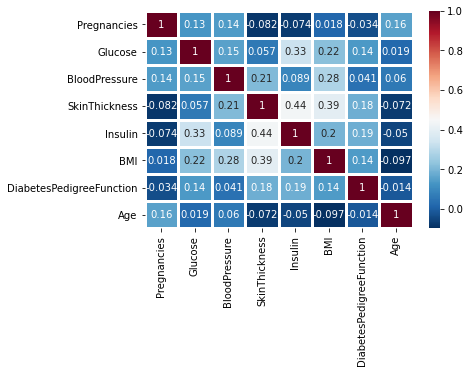

In [4]:
import seaborn as sns

df_cor=data.drop(columns=['Outcome']).corr(method='pearson')
sns.heatmap(df_cor, xticklabels=df_cor.columns, yticklabels=df_cor.columns, cmap='RdBu_r', annot=True, linewidth=3)

0.9이상의 상관관계를 가지는 변수는 없었으므로 모든 변수를 사용하여 모델링

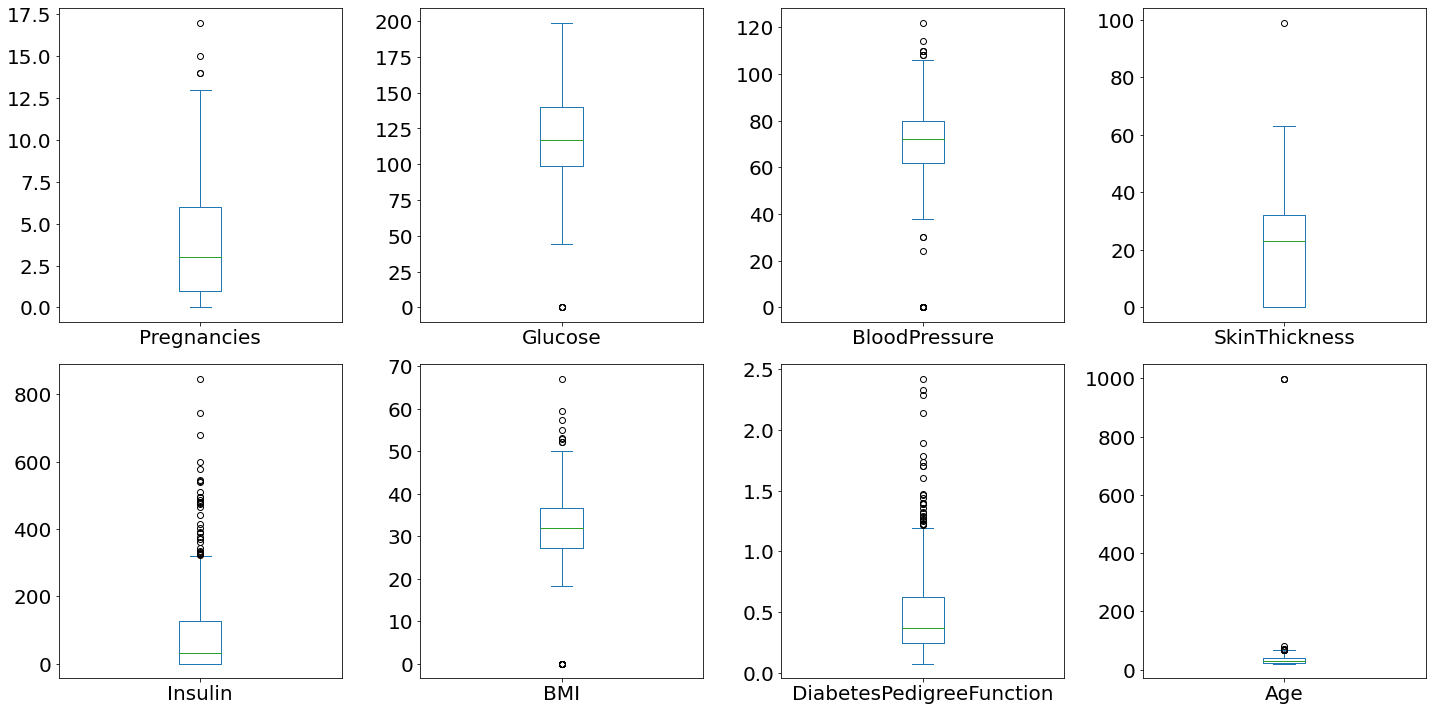

In [5]:
data.drop(columns=['Outcome']).plot(kind='box', subplots=True, layout=(2,4), figsize=(20,10), fontsize=20)
plt.tight_layout()
plt.show()

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

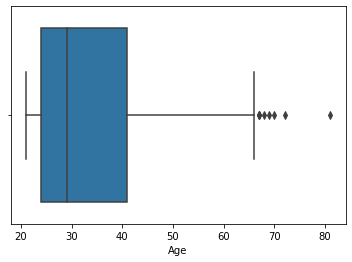

In [8]:
outlier_index=data[data['Age']>400].index
data.loc[outlier_index, 'Age']=data.Age.median()
sns.boxplot(data['Age'])

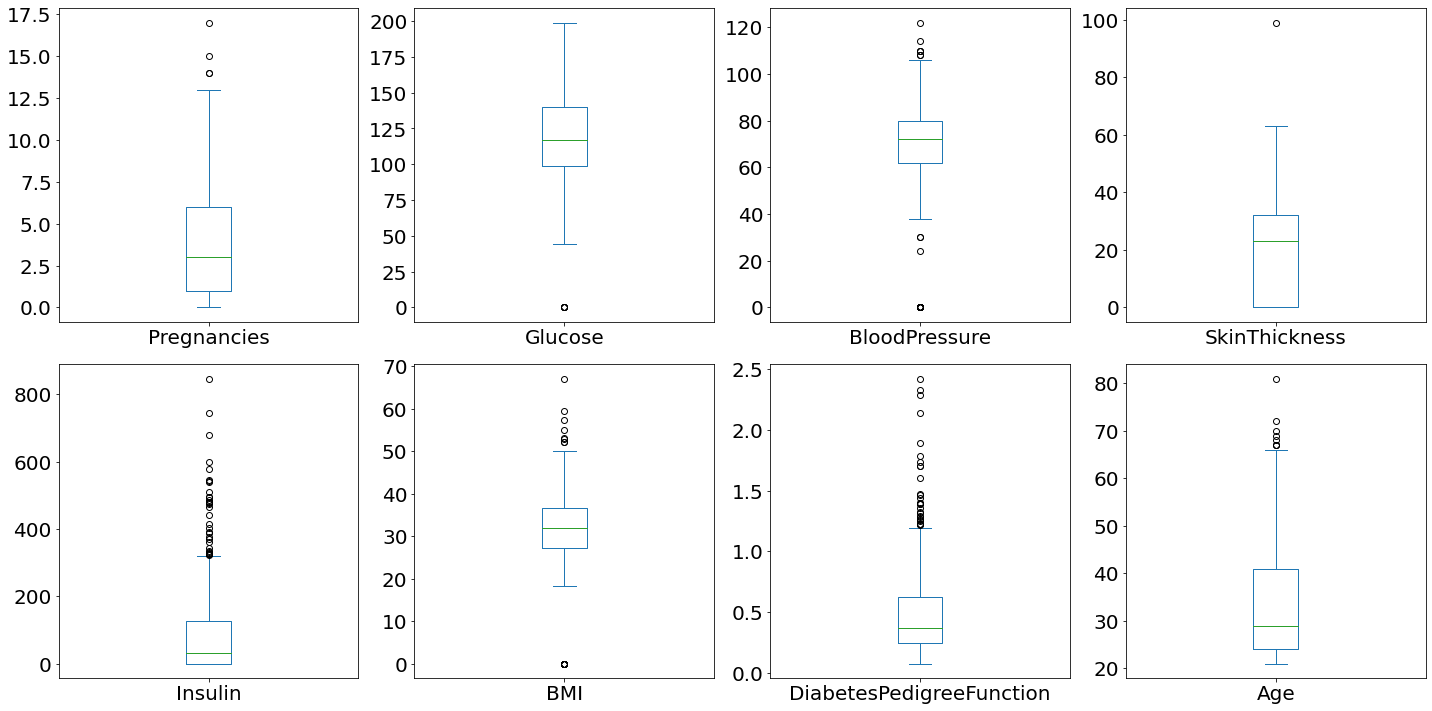

In [9]:
data.drop(columns=['Outcome']).plot(kind='box', subplots=True, layout=(2,4), figsize=(20,10), fontsize=20)
plt.tight_layout()
plt.show()

#의미상 Glucose, BloddPressure 0 제거

In [10]:
outlier_index_g=data[data['Glucose']==0].index
data.loc[outlier_index_g, 'Glucose']=data.Glucose.median()
outlier_index_b=data[data['BloodPressure']==0].index
data.loc[outlier_index_b, 'BloodPressure']=data.BloodPressure.median()

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm

log=LogisticRegression()
xgb=XGBClassifier(random_state=0)
svm_clf=svm.SVC(kernel='linear')

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [21]:
X_train, y_train=smote.fit_resample(X_train, y_train)

- 로지스틱

In [30]:
#warinng 무시
import warnings
warnings.filterwarnings('ignore')

lr=LogisticRegression()
start=time.time()
lr.fit(X_train, y_train)
end=time.time()
pred=lr.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"{end-start:.5f}")
print(accuracy_score(pred, y_test))

0.04610
0.7857142857142857


- xgb

In [31]:
xgb=XGBClassifier()
start=time.time()
xgb.fit(X_train, y_train)
end=time.time()
pred=xgb.predict(X_test)

print(f"{end-start:.5f}")
print(accuracy_score(pred, y_test))

[18:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.36620
0.8116883116883117


In [37]:
svm_clf=svm.SVC(kernel='linear')
start=time.time()
svm_clf.fit(X_train, y_train)
end=time.time()
pred=svm_clf.predict(X_test)

print(f"{end-start:.5f}")
print(accuracy_score(pred, y_test))

13.11517
0.7662337662337663


- 차원축소

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [39]:
smote=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=2022)
sclaer=StandardScaler()
X_train_s=sclaer.fit_transform(X_train)
X_test_s=sclaer.transform(X_test)

In [40]:
pca=PCA(n_components=8)
X_train_pca=pca.fit(X_train_s)

In [41]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546328


### 2-1. 등분산검정

In [42]:
import pandas as pd
import numpy as np
data=pd.read_csv("metalicity")
data

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


H0 : 제품들의 금속 재질 함유량 분산 1.3이다

H1 : 제품들의 금속 재질 함유량 분산은 1.3이 아니다

In [44]:
import scipy.stats as stats
stats.shapiro(data['metalicity'])

ShapiroResult(statistic=0.9822468757629395, pvalue=0.05002119019627571)

In [45]:
print(len(data))

150


귀무가설을 기각할 수 없으므로 정규분포를 따른다

In [46]:
A=np.random.normal(data['metalicity'].mean(), 1.3**0.5, 150)
A

array([45.38449723, 44.00124459, 44.68516572, 45.03952327, 44.46565609,
       45.01629195, 45.7296028 , 43.91189614, 45.82792641, 44.17553178,
       45.34349155, 46.79607858, 45.81042293, 46.1920075 , 44.87999559,
       44.94506461, 45.46702832, 46.65892464, 45.64251969, 46.16858595,
       45.58842032, 44.78005604, 46.40694664, 44.52428229, 44.53157148,
       44.82401269, 46.35205411, 46.31714213, 46.10299763, 44.17735435,
       43.45834778, 44.44739312, 45.34725636, 45.84049471, 45.98318579,
       46.87156781, 46.77608177, 45.53118891, 46.33392595, 43.22220793,
       46.68846387, 45.16334658, 45.29841968, 42.74463149, 44.73103119,
       43.8778191 , 46.31512787, 44.79675743, 47.9130381 , 46.02474437,
       45.21151836, 43.84436577, 44.80677887, 44.49408267, 43.3901758 ,
       43.82404536, 45.59583468, 47.42946885, 43.3578112 , 45.89679352,
       44.97857962, 44.13309844, 46.0943252 , 46.52879842, 46.23935935,
       47.35220375, 45.43244316, 44.50849071, 45.56851722, 45.72

In [48]:
stats.levene(data['metalicity'], A)

LeveneResult(statistic=7.176852330704762, pvalue=0.007795212443544219)